## Data Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("coffee_house_updated.csv")
df.head()

,gender,age,customer_type,annual_income,visits,drink_preference,time_spend,nearest_outlet,membership,most_bought,spend_per_visit,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house,promotion_updates,loyalty
0,Female,20-29,Student,< 25000 RM,Rarely,Dine in,30 m - 1 hr,within 1km,True,Coffee,< 20 RM,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,True
1,Female,20-29,Student,< 25000 RM,Rarely,Take away,< 30 m,1km - 3km,True,Cold drinks;Pastries,< 20 RM,4,3,4,4,4,5,2,Social Media;In Store displays,True
2,Male,20-29,Employed,< 25000 RM,Monthly,Dine in,30 m - 1 hr,more than 3km,True,Coffee,< 20 RM,4,3,4,4,4,4,3,In Store displays;Billboards,True
3,Female,20-29,Student,< 25000 RM,Rarely,Take away,< 30 m,more than 3km,False,Coffee,< 20 RM,2,1,4,3,3,3,3,Through friends and word of mouth,False
4,Male,20-29,Student,< 25000 RM,Monthly,Take away,30 m - 1 hr,1km - 3km,False,Coffee;Sandwiches,20 - 40 (RM),3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,True


In [3]:
categorical_columns = list(df.select_dtypes(exclude=np.number).columns)
categorical_columns

['gender',
 'age',
 'customer_type',
 'annual_income',
 'visits',
 'drink_preference',
 'time_spend',
 'nearest_outlet',
 'membership',
 'most_bought',
 'spend_per_visit',
 'promotion_updates',
 'loyalty']

In [4]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

In [5]:
df.head()

,gender,age,customer_type,annual_income,visits,drink_preference,time_spend,nearest_outlet,membership,most_bought,spend_per_visit,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house,promotion_updates,loyalty
0,0.0,0.0,3.0,3.0,3.0,0.0,2.0,2.0,1.0,0.0,2.0,4,3,5,5,4,4,3,24.0,1.0
1,0.0,0.0,3.0,3.0,3.0,2.0,3.0,0.0,1.0,11.0,2.0,4,3,4,4,4,5,2,12.0,1.0
2,1.0,0.0,0.0,3.0,1.0,0.0,2.0,1.0,1.0,0.0,2.0,4,3,4,4,4,4,3,4.0,1.0
3,0.0,0.0,3.0,3.0,3.0,2.0,3.0,1.0,0.0,0.0,2.0,2,1,4,3,3,3,3,29.0,0.0
4,1.0,0.0,3.0,3.0,1.0,2.0,2.0,0.0,0.0,7.0,1.0,3,3,4,2,2,3,3,21.0,1.0


In [6]:
X = df.drop('loyalty', axis =1)
Y = df[['loyalty']]

print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Set Shape   : ', Y.shape)

Independent Feature Set Shape :  (122, 19)
Dependent Feature Set Shape   :  (122, 1)


In [7]:
Y.value_counts(normalize=True)*100

loyalty
1.0        77.04918
0.0        22.95082
dtype: float64

### There is a huge imbalance in data in the dependent column where 77% of data belongs to majority class (1) and around 23% belongs to minority class (0). Here we handle the imbalanced data by oversampling the minority class using SMOTE
### =======================================================================================

In [8]:
from imblearn.over_sampling import SMOTE
smote_sampler = SMOTE()
x_sampled, y_sampled = smote_sampler.fit_resample(X, Y)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (188, 19)
Labels :  (188, 1)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 42)

print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (150, 19)
Training Labels Shape :  (150, 1)
Testing Data Shape    :  (38, 19)
Testing Labels Shape  :  (38, 1)


### Using KNN Algorithm

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p =2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
from sklearn.metrics import accuracy_score
pred_train = classifier.predict(x_train)
y_pred  = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test,y_pred))

Training Set Accuracy :  0.9066666666666666
Testing Set Accuracy  :  0.8947368421052632


In [12]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[20,  1],
       [ 2, 15]], dtype=int64)

- The KNN algorithm, with the chosen configuration or hyperparameters, achieved a good accuracy of around 90% on both the 
  training and testing sets. 
- Out of the 38 predictions, 35 were predicted correct and only 3 predictions were wrong.
### ======================================================================================

### Using RandomForest Algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, max_depth =3,random_state = 17)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=17)

In [27]:
pred_train = classifier.predict(x_train)
y_pred  = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, y_pred))

Training Set Accuracy :  0.9266666666666666
Testing Set Accuracy  :  0.8947368421052632


In [15]:
cm= confusion_matrix(y_test, y_pred)  
cm

array([[17,  4],
       [ 2, 15]], dtype=int64)

- The RandomForest algorithm also achieved a good accuracy of around 93% on training set and 90% on
  testing sets. 
- Out of the 38 predictions 32 were predicted correct and 6 predictions were wrong.
### ======================================================================================

In [28]:
feature_importances = classifier.feature_importances_
feature_importances

array([0.00311586, 0.03924944, 0.00537692, 0.01150933, 0.03222452,
       0.00537061, 0.        , 0.0248422 , 0.06085386, 0.02967835,
       0.11222241, 0.13669654, 0.29298739, 0.00205845, 0.02817259,
       0.02102168, 0.02903988, 0.10590988, 0.05967008])

In [29]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
12,price_rating,0.292987
11,quality_rating,0.136697
10,spend_per_visit,0.112222
17,prefer_coffee_house,0.105910
8,membership,0.060854
18,promotion_updates,0.059670
1,age,0.039249
4,visits,0.032225
9,most_bought,0.029678
16,service_rating,0.029040


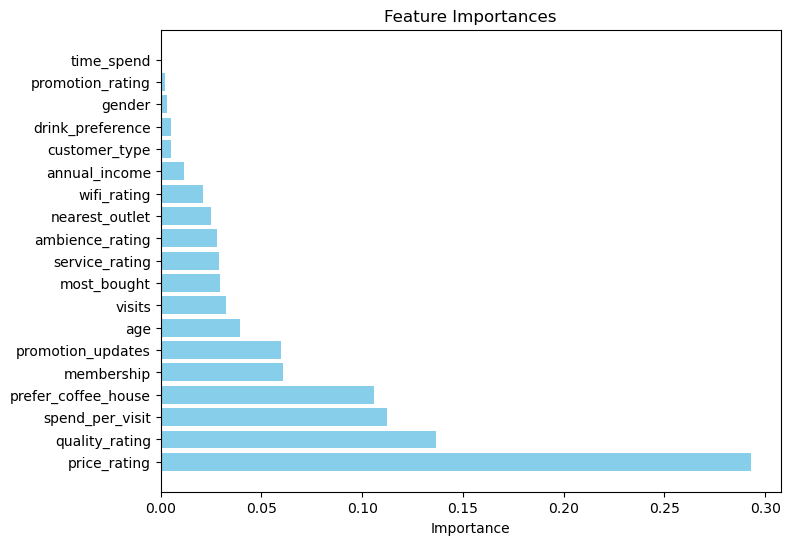

In [30]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### 'price_rating' features have a more significant impact on the model's predictions with a contribution of around 29%, which means that the price of the products has a greatest impact on the retention rates.